In [4]:
# Basic Data Science and ML Pipeline
# OSEMN Pipeline
# O - Obtaining our data
# S - Scrubbing / Cleaning our data
# E - Exploring / Visualizing our data will allow us to find patterns and trends
# M - Modeling our data will give us our predictive power as a wizard
# N - INterpreting our data
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')


## O - Obtaining our data
df = pd.read_csv('data/diabetes.csv')
print(df)




     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
# S - Scrubbing / Cleaning our data
# Basic EDA & Statistical analysis:
        ## gives information about the data types,columns, null value counts, memory usage etc
        ## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

df.info(verbose=True)
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


NameError: name 'diabetes_data' is not defined

In [7]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_copy = df.copy(deep=True)

df_copy[['Pregnancies' ,'Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Pregnancies' ,'Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)


print(df_copy)


## showing the count of Null
print('\n\n')
print(df_copy.describe())

print('\n\n')
## showing the count of Nans
print(df_copy.isnull().sum())



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

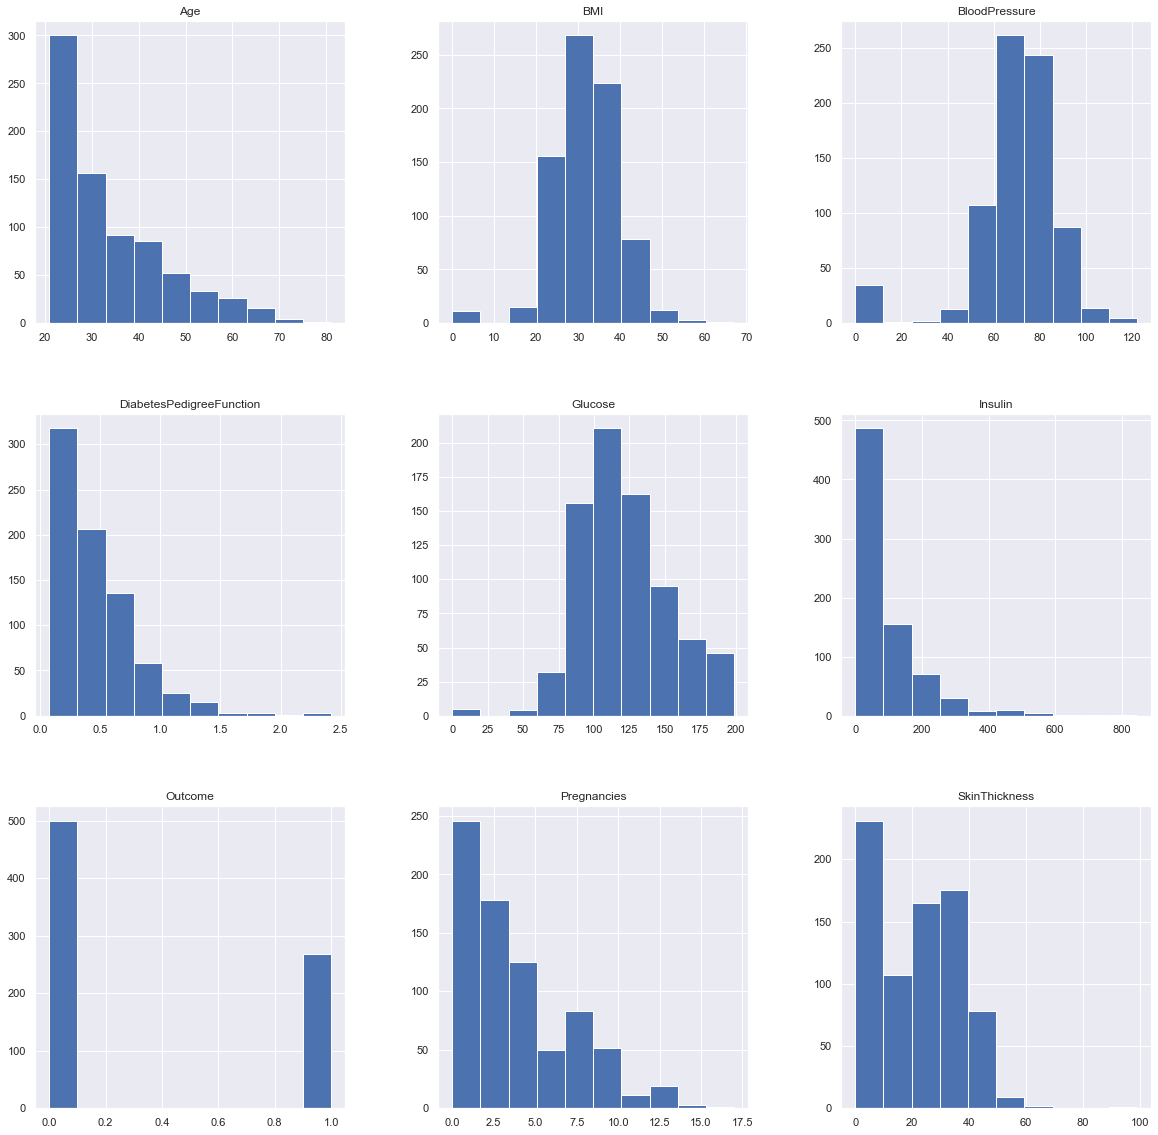

In [9]:
#To fill these Nan values the data distribution needs to be understood

df.hist(figsize=(20,20))
plt.show()

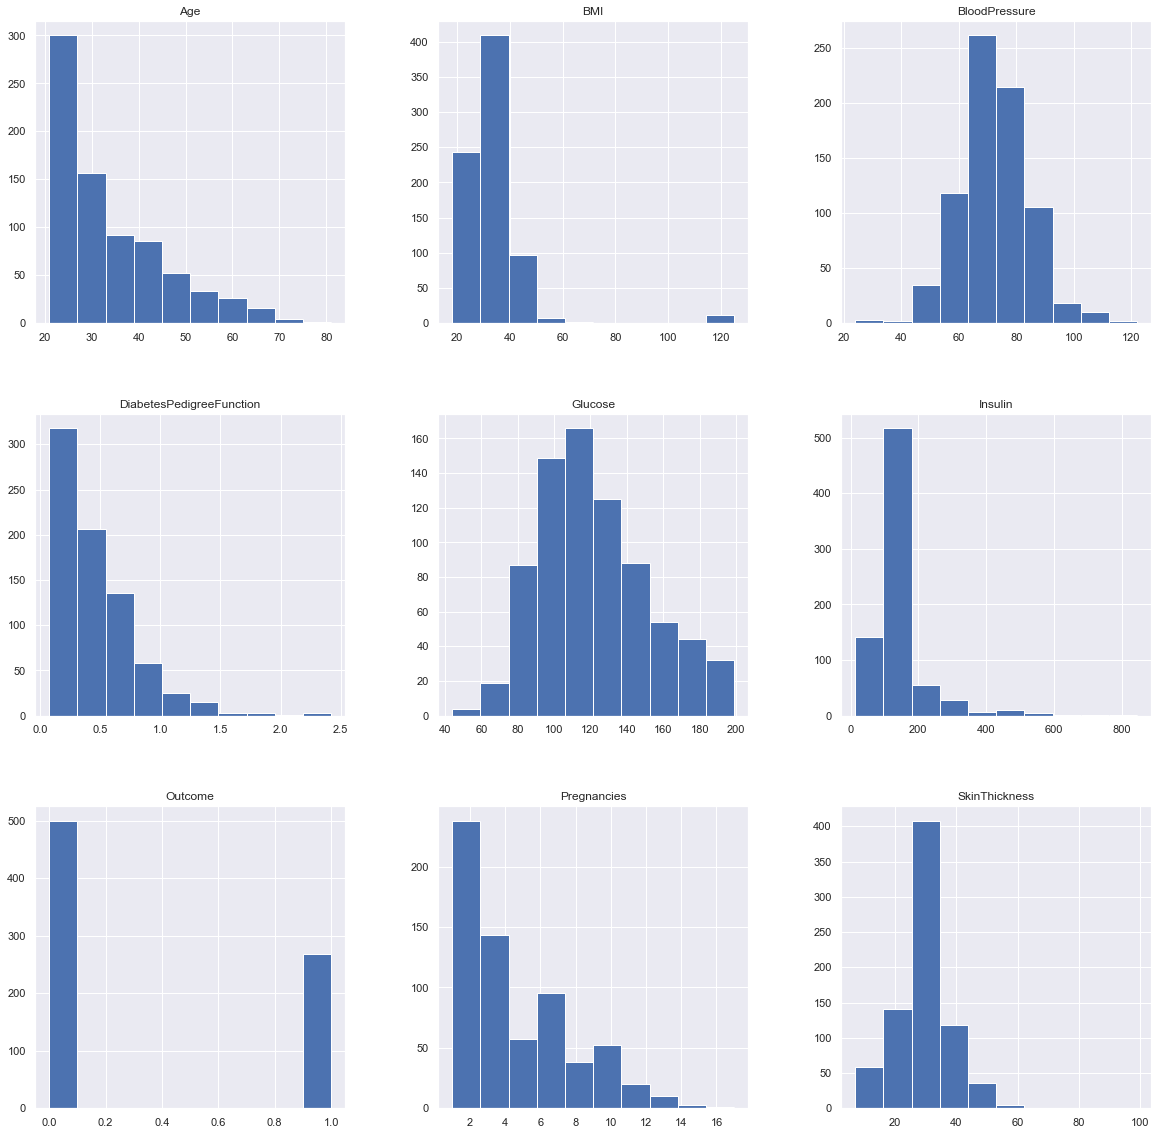

In [10]:
#aiming to impute nan values for the columns in accordance with their distribution

df_copy['Glucose'].fillna(df_copy['Glucose'].median() , inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median() , inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median() , inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median() , inplace = True)
df_copy['BMI'].fillna(df_copy['Insulin'].median(),inplace = True)

#Plotting after Nan removal¶
df_copy.hist(figsize=(20,20))
plt.show()


In [11]:
#observing the shape of the data
print(df.shape)

(768, 9)


In [13]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)



#data type analysis
#plt.figure(figsize=(5,5))
#sns.set()

sns.countplot(y=df.dtypes , data = df_copy)
plt.xlabel('count of each data type')
plt.ylabel('data types')
plt.show()


TypeError: data type "Pregnancies" not understood

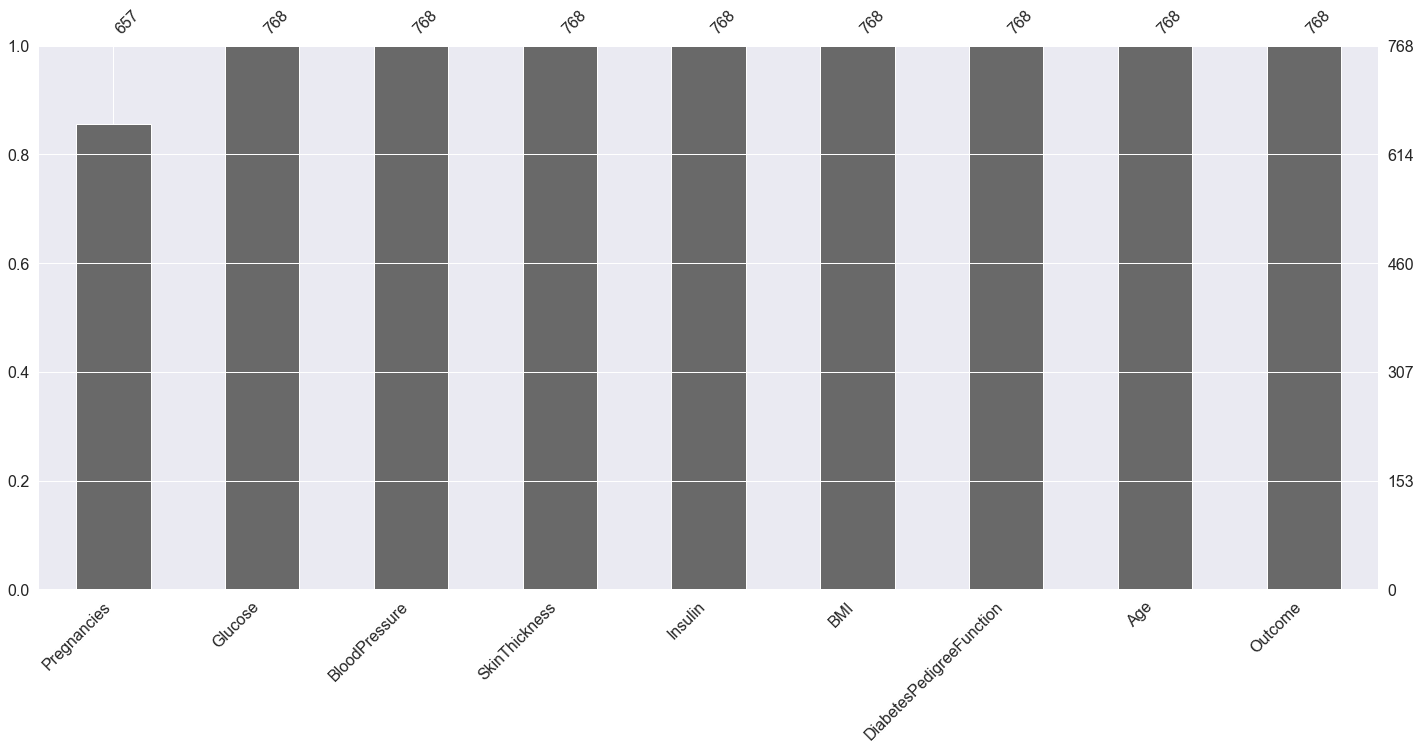

In [16]:
## null count analysis
import missingno as msno
p=msno.bar(df_copy)
plt.show(p)

AxesSubplot(0.125,0.125;0.775x0.755)


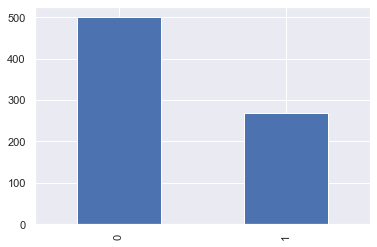

In [23]:
print(df_copy.Outcome.value_counts().plot(kind='bar'))

